In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import shap
import lime
from lime.lime_tabular import LimeTabularExplainer

d:\Data Science\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Load the dataset
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Check for missing values
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [3]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
data.shape

(7043, 21)

In [6]:
# Drop unnecessary columns and handle categorical features
data = data.drop(columns=['customerID'])

In [7]:
data.describe(include='all')

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,6531,2
top,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [8]:
col_list = ['tenure','MonthlyCharges','TotalCharges']
for i in data.columns:
    if i not in col_list:
        data[i] = data[i].astype('category')
    else:
        pass

In [9]:
data.shape

(7043, 20)

In [10]:
data[data['TotalCharges']==' '].shape

(11, 20)

In [11]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [12]:
data.dropna(axis=0,inplace=True)

In [13]:
data.shape,data.dtypes

((7032, 20),
 gender              category
 SeniorCitizen       category
 Partner             category
 Dependents          category
 tenure                 int64
 PhoneService        category
 MultipleLines       category
 InternetService     category
 OnlineSecurity      category
 OnlineBackup        category
 DeviceProtection    category
 TechSupport         category
 StreamingTV         category
 StreamingMovies     category
 Contract            category
 PaperlessBilling    category
 PaymentMethod       category
 MonthlyCharges       float64
 TotalCharges         float64
 Churn               category
 dtype: object)

In [14]:
data = pd.get_dummies(data, drop_first=True)

In [15]:
data.shape

(7032, 31)

In [16]:
data.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'gender_Male',
       'SeniorCitizen_1', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes'],
      dtype='object')

In [17]:
# Split into features and target
X = data.drop(columns=['Churn_Yes'])
y = data['Churn_Yes']

In [18]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
# Build the ANN model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_dim=X_train.shape[1]),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification (Churn or No Churn)
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

d:\Data Science\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7224 - loss: 0.5206 - val_accuracy: 0.7875 - val_loss: 0.4414
Epoch 2/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8002 - loss: 0.4227 - val_accuracy: 0.7896 - val_loss: 0.4367
Epoch 3/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8141 - loss: 0.4040 - val_accuracy: 0.7953 - val_loss: 0.4370
Epoch 4/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8098 - loss: 0.4111 - val_accuracy: 0.7868 - val_loss: 0.4371
Epoch 5/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8117 - loss: 0.4052 - val_accuracy: 0.7910 - val_loss: 0.4369
Epoch 6/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8178 - loss: 0.3860 - val_accuracy: 0.7896 - val_loss: 0.4373
Epoch 7/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8154 - loss: 0.3951 - val_accuracy: 0.7882 - val_loss: 0.4385
Epoch 8/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8199 - loss: 0.3854 - val_accuracy: 0.

In [20]:
# Evaluate the model on the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Accuracy: 0.7839374555792467
              precision    recall  f1-score   support

       False       0.82      0.90      0.86      1033
        True       0.63      0.46      0.53       374

    accuracy                           0.78      1407
   macro avg       0.72      0.68      0.70      1407
weighted avg       0.77      0.78      0.77      1407



In [21]:
# Modify predict function to return both probabilities
def predict_proba_lime(X):
    probabilities = model.predict(X)  # Model predicts probability of "Churn" class
    return np.hstack([1 - probabilities, probabilities])  # Return probabilities for both classes (No Churn, Churn)

# Create a LIME explainer object
explainer_lime = LimeTabularExplainer(X_train, feature_names=X.columns, class_names=['No Churn', 'Churn'], mode='classification')

In [22]:
# Choose a sample from the test set to explain
idx = 10  # You can change this index to explain other instances
lime_exp = explainer_lime.explain_instance(X_test[idx], predict_proba_lime)

# Display the explanation in the notebook
lime_exp.show_in_notebook()

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [23]:
# Create a SHAP explainer object
explainer_shap = shap.KernelExplainer(model.predict, X_train[:100])

# Compute SHAP values for the first 10 samples in the test set
shap_values = explainer_shap.shap_values(X_test[:10])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


  0%|          | 0/10 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step


 10%|█         | 1/10 [00:26<03:57, 26.41s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step


 20%|██        | 2/10 [00:58<03:56, 29.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step


 30%|███       | 3/10 [01:29<03:33, 30.49s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step


 40%|████      | 4/10 [02:01<03:05, 30.97s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step


 50%|█████     | 5/10 [02:15<02:03, 24.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step


 60%|██████    | 6/10 [02:27<01:22, 20.55s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step


 70%|███████   | 7/10 [02:39<00:53, 17.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step


 80%|████████  | 8/10 [02:52<00:32, 16.21s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 90%|█████████ | 9/10 [03:06<00:15, 15.57s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


100%|██████████| 10/10 [03:20<00:00, 20.06s/it]


In [24]:
shap_values_squeezed = np.squeeze(shap_values, axis=-1)

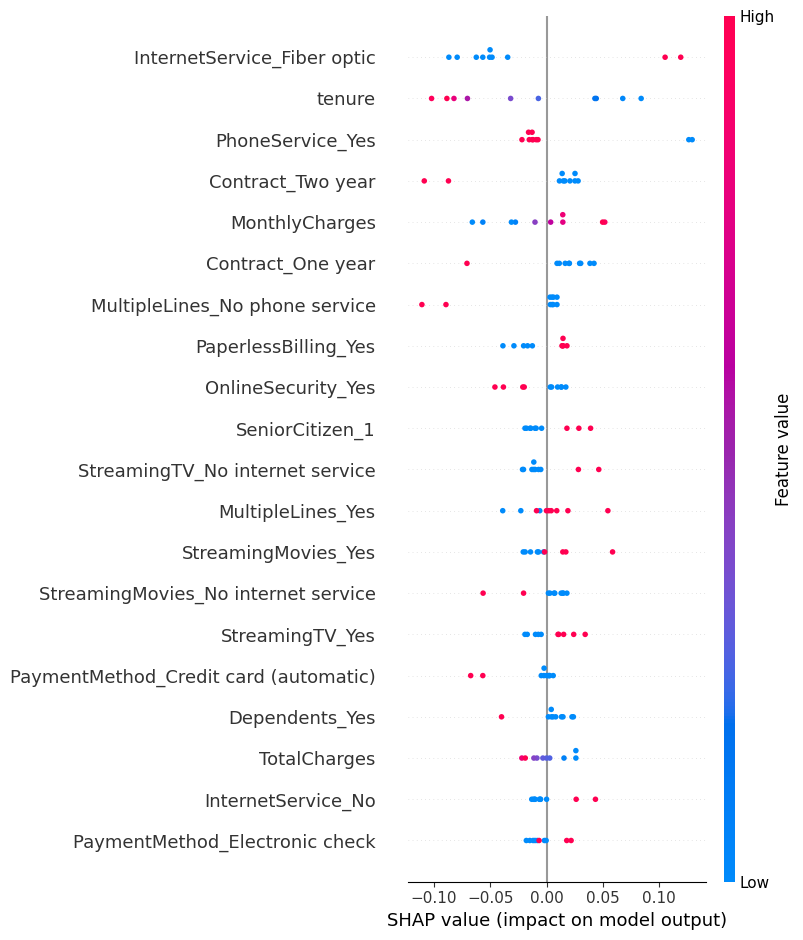

In [25]:
# SHAP Summary Plot
shap.summary_plot(shap_values_squeezed, X_test[:10], feature_names=X.columns)

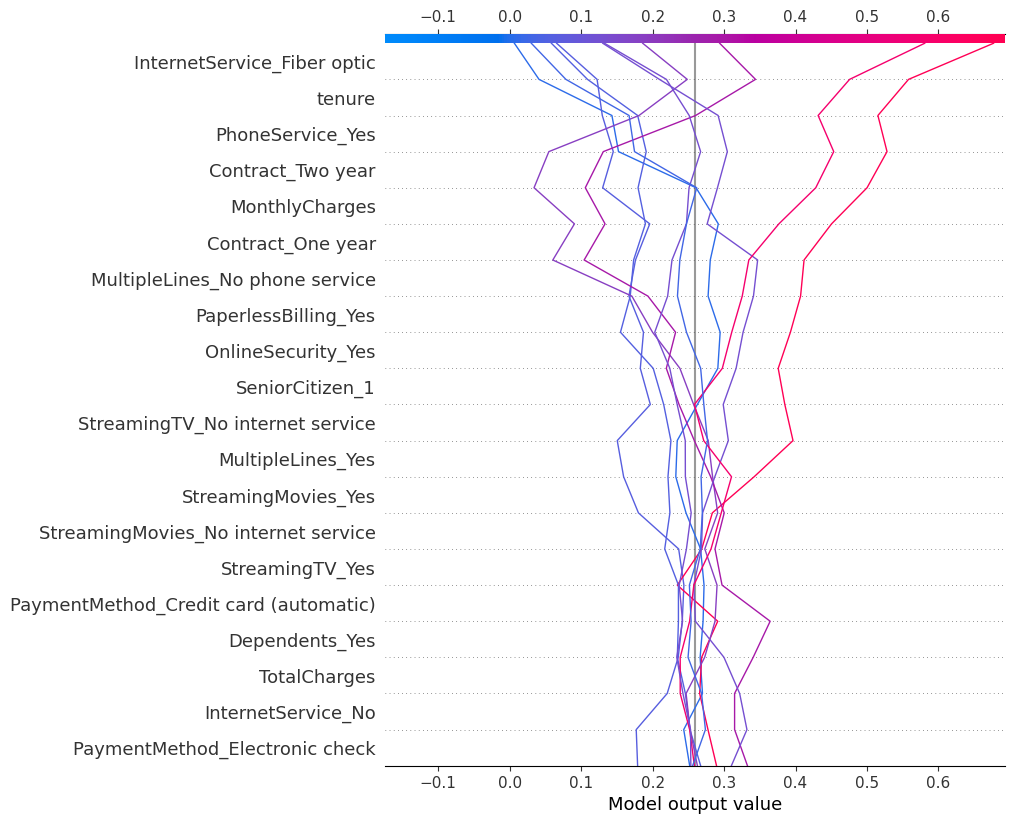

In [26]:
shap.decision_plot(
    explainer_shap.expected_value[0],  # Single expected value for the model
    shap_values_squeezed,              # Corrected SHAP values
    X_test[:10],                     # Subset of X_test
    feature_names=X.columns.tolist()   # Feature names as a list
)   

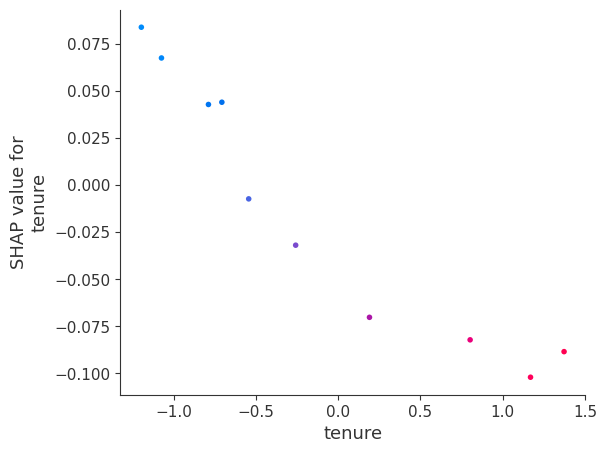

In [27]:
shap.dependence_plot('tenure', shap_values_squeezed, X_test[:10], feature_names=X.columns)

In [28]:
# Select the specific sample you want to explain (e.g., the first sample)
sample_index = 1  # You can change this to explore other samples

# Create the Explanation object
explanation = shap.Explanation(
    values=shap_values_squeezed[sample_index],  # SHAP values for the selected sample
    base_values=explainer_shap.expected_value[0],  # Base value for the model
    data=X_test[:10][sample_index],       # Feature values for the selected sample
    feature_names=X.columns.tolist()             # List of feature names
)

In [29]:
y_test

2481    False
6784    False
6125     True
3052    False
4099    False
        ...  
1733    False
5250    False
5465    False
5851    False
3984    False
Name: Churn_Yes, Length: 1407, dtype: bool

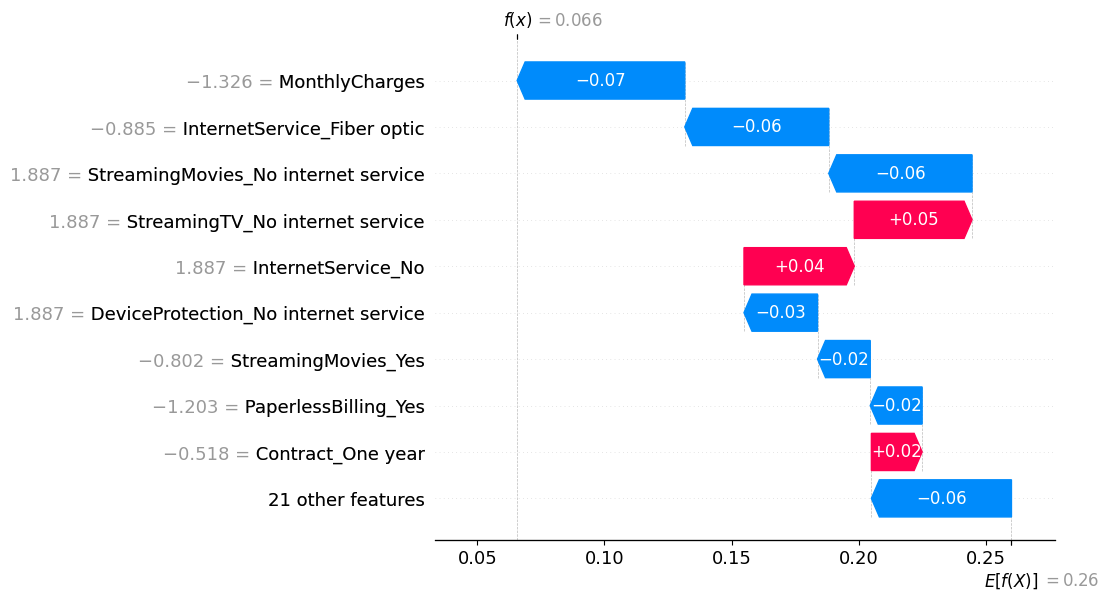

In [30]:
shap.waterfall_plot(explanation)